<a href="https://colab.research.google.com/github/Savithmee/CM2604--Machine-Learning-/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Model Implementation
## Telco Customer Churn - Neural Network & Decision Tree

**Module:** CM2604 Machine Learning  
**Academic Year:** 2025/2026  
**Lecturer:** Sahan Priyanayana

This notebook implements binary classification to predict customer churn using:
- **Neural Network** model (MLPClassifier from scikit-learn)
- **Decision Tree** model (DecisionTreeClassifier from scikit-learn)

### Task 2 Requirements:
1. Data preprocessing for the dataset, problem, and algorithms
2. Hyperparameter tuning for both models
3. Model evaluation and comparison
4. Experimental results for both models

### Libraries Used:
- **pandas** - Data manipulation
- **numpy** - Numerical computations
- **scikit-learn** - Machine learning models and evaluation
- **matplotlib** - Visualizations
- **seaborn** - Statistical plots

## 1. Install and Import Required Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score)

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print("\nLibraries used:")
print("- pandas (pd): Data manipulation")
print("- numpy (np): Numerical computations")
print("- scikit-learn: Machine learning models and evaluation")
print("- matplotlib (plt): Visualizations")
print("- seaborn (sns): Statistical plots")

Libraries imported successfully!

Libraries used:
- pandas (pd): Data manipulation
- numpy (np): Numerical computations
- scikit-learn: Machine learning models and evaluation
- matplotlib (plt): Visualizations
- seaborn (sns): Statistical plots


## 2. Load Dataset from Google Drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv('/content/drive/MyDrive/ML_CW/CSV_FILE.csv')
print("="*80)
print("DATASET LOADED SUCCESSFULLY")
print("="*80)
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nFirst few rows:")
df.head()

DATASET LOADED SUCCESSFULLY
Shape: 7043 rows, 21 columns

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Data Preprocessing

This section handles:
- Missing values and empty strings
- Categorical variable encoding
- Feature scaling
- Train-test split
- Class imbalance handling

In [19]:
df_processed = df.copy()

print("="*80)
print("DATA PREPROCESSING")
print("="*80)
print(f"Original dataset shape: {df_processed.shape}")

# Step 1: Remove customerID (not needed for modeling)
if 'customerID' in df_processed.columns:
    df_processed = df_processed.drop('customerID', axis=1)
    print(" Removed customerID column")

# Step 2: Handle TotalCharges - convert empty strings to numeric
if 'TotalCharges' in df_processed.columns:
    # Replace empty strings with NaN, then fill with 0 (for new customers)
    df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
    df_processed['TotalCharges'] = df_processed['TotalCharges'].fillna(0)
    print(" Converted TotalCharges to numeric and handled empty strings")

# Step 3: Convert target variable (Churn) to binary numeric
if 'Churn' in df_processed.columns:
    df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})
    print(" Converted Churn to binary (1=Yes, 0=No)")
    print(f"  Churn distribution: {df_processed['Churn'].value_counts().to_dict()}")

print(f"\nProcessed dataset shape: {df_processed.shape}")
df_processed.head()

DATA PREPROCESSING
Original dataset shape: (7043, 21)
 Removed customerID column
 Converted TotalCharges to numeric and handled empty strings
 Converted Churn to binary (1=Yes, 0=No)
  Churn distribution: {0: 5174, 1: 1869}

Processed dataset shape: (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [20]:
# Step 4: Encode categorical variables
# Separate features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

print("="*80)
print("ENCODING CATEGORICAL VARIABLES")
print("="*80)

# Get categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}")

# Use pandas get_dummies for one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"\n Encoded categorical variables")
print(f"  Original features: {X.shape[1]}")
print(f"  Encoded features: {X_encoded.shape[1]}")
print(f"  New feature names: {list(X_encoded.columns[:10])}...")  # Show first 10

X_encoded.head()

ENCODING CATEGORICAL VARIABLES
Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

 Encoded categorical variables
  Original features: 19
  Encoded features: 30
  New feature names: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes']...


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [21]:
# Step 5: Split dataset into training and testing sets
# Use stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintains class distribution
)

print("="*80)
print("TRAIN-TEST SPLIT")
print("="*80)
print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Testing set: {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

TRAIN-TEST SPLIT
Training set: 5634 samples, 30 features
Testing set: 1409 samples, 30 features

Training set class distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

Testing set class distribution:
Churn
0    1035
1     374
Name: count, dtype: int64


In [22]:
# Step 6: Feature Scaling (Important for Neural Networks)
# StandardScaler standardizes features to have mean=0 and std=1

scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("="*80)
print("FEATURE SCALING")
print("="*80)
print(" Features scaled using StandardScaler")
print(f"  Training set mean: {X_train_scaled.mean().mean():.6f}")
print(f"  Training set std: {X_train_scaled.std().mean():.6f}")
print(f"  (Should be close to 0 and 1 respectively)")

X_train_scaled.head()

FEATURE SCALING
 Features scaled using StandardScaler
  Training set mean: -0.000000
  Training set std: 1.000089
  (Should be close to 0 and 1 respectively)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,-0.441773,0.102371,-0.521976,-0.262257,0.994336,-0.969234,-0.651557,-3.013090,3.013090,-0.858338,...,-0.524081,1.252163,-0.524081,1.247967,-0.512782,-0.563822,-1.202653,-0.523806,1.406903,-0.543846
3151,-0.441773,-0.711743,0.337478,-0.503635,0.994336,1.031742,1.534786,0.331885,-0.331885,-0.858338,...,-0.524081,-0.798618,-0.524081,-0.801303,-0.512782,-0.563822,-1.202653,-0.523806,-0.710781,1.838757
4860,-0.441773,-0.793155,-0.809013,-0.749883,0.994336,1.031742,1.534786,-3.013090,3.013090,-0.858338,...,-0.524081,-0.798618,-0.524081,-0.801303,-0.512782,1.773611,-1.202653,-0.523806,-0.710781,1.838757
3867,-0.441773,-0.263980,0.284384,-0.172722,-1.005696,1.031742,-0.651557,0.331885,-0.331885,-0.858338,...,-0.524081,1.252163,-0.524081,1.247967,-0.512782,1.773611,0.831495,1.909105,-0.710781,-0.543846
3810,-0.441773,-1.281624,-0.676279,-0.989374,0.994336,1.031742,1.534786,0.331885,-0.331885,-0.858338,...,-0.524081,-0.798618,-0.524081,-0.801303,-0.512782,-0.563822,-1.202653,-0.523806,1.406903,-0.543846


## 4. Neural Network Model Implementation

In [23]:
print("="*80)
print("NEURAL NETWORK MODEL - INITIAL")
print("="*80)

# Create Neural Network model
# Using scaled data (important for neural networks)
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 neurons, then 50 neurons
    activation='relu',              # ReLU activation function
    solver='adam',                  # Adam optimizer
    alpha=0.001,                    # L2 regularization parameter
    learning_rate='adaptive',       # Adaptive learning rate
    max_iter=500,                   # Maximum iterations
    random_state=42,
    early_stopping=True,            # Stop if no improvement
    validation_fraction=0.1        # 10% of training data for validation
)

# Train the model
print("Training Neural Network model...")
nn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_proba_nn = nn_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_proba_nn)

print("\n Model trained successfully!")
print(f"\nInitial Neural Network Performance:")
print(f"  Accuracy:  {accuracy_nn:.4f}")
print(f"  Precision: {precision_nn:.4f}")
print(f"  Recall:    {recall_nn:.4f}")
print(f"  F1-Score:  {f1_nn:.4f}")
print(f"  ROC-AUC:   {auc_nn:.4f}")

NEURAL NETWORK MODEL - INITIAL
Training Neural Network model...

 Model trained successfully!

Initial Neural Network Performance:
  Accuracy:  0.7899
  Precision: 0.6291
  Recall:    0.5080
  F1-Score:  0.5621
  ROC-AUC:   0.8379


### 4.1 Hyperparameter Tuning for Neural Network

In [24]:
print("="*80)
print("NEURAL NETWORK - HYPERPARAMETER TUNING")
print("="*80)
print("This may take several minutes...")

# Define parameter grid for hyperparameter tuning
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create base model
nn_base = MLPClassifier(
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

# GridSearchCV with 5-fold cross-validation
nn_grid = GridSearchCV(
    nn_base,
    param_grid_nn,
    cv=5,                    # 5-fold cross-validation
    scoring='roc_auc',       # Use ROC-AUC as scoring metric
    n_jobs=-1,               # Use all available CPUs
    verbose=1                # Show progress
)

# Fit the grid search
print("\nStarting grid search...")
nn_grid.fit(X_train_scaled, y_train)

print("\n Hyperparameter tuning completed!")
print(f"\nBest parameters: {nn_grid.best_params_}")
print(f"Best cross-validation score (ROC-AUC): {nn_grid.best_score_:.4f}")

# Get the best model
nn_best = nn_grid.best_estimator_

NEURAL NETWORK - HYPERPARAMETER TUNING
This may take several minutes...

Starting grid search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

 Hyperparameter tuning completed!

Best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
Best cross-validation score (ROC-AUC): 0.8426


In [25]:
y_pred_nn_best = nn_best.predict(X_test_scaled)
y_pred_proba_nn_best = nn_best.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics for best model
accuracy_nn_best = accuracy_score(y_test, y_pred_nn_best)
precision_nn_best = precision_score(y_test, y_pred_nn_best)
recall_nn_best = recall_score(y_test, y_pred_nn_best)
f1_nn_best = f1_score(y_test, y_pred_nn_best)
auc_nn_best = roc_auc_score(y_test, y_pred_proba_nn_best)

print("="*80)
print("NEURAL NETWORK - BEST MODEL PERFORMANCE")
print("="*80)
print(f"Accuracy:  {accuracy_nn_best:.4f}")
print(f"Precision: {precision_nn_best:.4f}")
print(f"Recall:    {recall_nn_best:.4f}")
print(f"F1-Score:  {f1_nn_best:.4f}")
print(f"ROC-AUC:   {auc_nn_best:.4f}")

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn_best)
print(f"\nConfusion Matrix:")
print(cm_nn)

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_nn_best, target_names=['No Churn', 'Churn']))

NEURAL NETWORK - BEST MODEL PERFORMANCE
Accuracy:  0.8013
Precision: 0.6588
Recall:    0.5214
F1-Score:  0.5821
ROC-AUC:   0.8392

Confusion Matrix:
[[934 101]
 [179 195]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



## 5. Decision Tree Model Implementation

Using DecisionTreeClassifier from scikit-learn

In [26]:
print("="*80)
print("DECISION TREE MODEL - INITIAL")
print("="*80)

# Create Decision Tree model
# Note: Decision Trees don't require feature scaling
dt_model = DecisionTreeClassifier(
    criterion='gini',        # Gini impurity for splitting
    max_depth=10,            # Maximum depth of tree
    min_samples_split=20,    # Minimum samples to split a node
    min_samples_leaf=10,     # Minimum samples in a leaf
    random_state=42
)

# Train the model (using non-scaled data for Decision Tree)
print("Training Decision Tree model...")
dt_model.fit(X_train, y_train)



# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print("\n Model trained successfully!")
print(f"\nInitial Decision Tree Performance:")
print(f"  Accuracy:  {accuracy_dt:.4f}")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall:    {recall_dt:.4f}")
print(f"  F1-Score:  {f1_dt:.4f}")
print(f"  ROC-AUC:   {auc_dt:.4f}")

DECISION TREE MODEL - INITIAL
Training Decision Tree model...

 Model trained successfully!

Initial Decision Tree Performance:
  Accuracy:  0.7736
  Precision: 0.5920
  Recall:    0.4733
  F1-Score:  0.5260
  ROC-AUC:   0.7874


### 5.1 Hyperparameter Tuning for Decision Tree

In [28]:
print("="*80)
print("DECISION TREE - HYPERPARAMETER TUNING")
print("="*80)

# Define parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Create base model
dt_base = DecisionTreeClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
dt_grid = GridSearchCV(
    dt_base,
    param_grid_dt,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
print("Starting grid search...")
dt_grid.fit(X_train, y_train)

print("\n Hyperparameter tuning completed!")
print(f"\nBest parameters: {dt_grid.best_params_}")
print(f"Best cross-validation score (ROC-AUC): {dt_grid.best_score_:.4f}")

# Get the best model
dt_best = dt_grid.best_estimator_

DECISION TREE - HYPERPARAMETER TUNING
Starting grid search...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

 Hyperparameter tuning completed!

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 30}
Best cross-validation score (ROC-AUC): 0.8258


In [29]:
# Evaluate the best Decision Tree model
y_pred_dt_best = dt_best.predict(X_test)
y_pred_proba_dt_best = dt_best.predict_proba(X_test)[:, 1]

# Calculate metrics for best model
accuracy_dt_best = accuracy_score(y_test, y_pred_dt_best)
precision_dt_best = precision_score(y_test, y_pred_dt_best)
recall_dt_best = recall_score(y_test, y_pred_dt_best)
f1_dt_best = f1_score(y_test, y_pred_dt_best)
auc_dt_best = roc_auc_score(y_test, y_pred_proba_dt_best)

print("="*80)
print("DECISION TREE - BEST MODEL PERFORMANCE")
print("="*80)
print(f"Accuracy:  {accuracy_dt_best:.4f}")
print(f"Precision: {precision_dt_best:.4f}")
print(f"Recall:    {recall_dt_best:.4f}")
print(f"F1-Score:  {f1_dt_best:.4f}")
print(f"ROC-AUC:   {auc_dt_best:.4f}")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt_best)
print(f"\nConfusion Matrix:")
print(cm_dt)

# Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_dt_best, target_names=['No Churn', 'Churn']))

DECISION TREE - BEST MODEL PERFORMANCE
Accuracy:  0.7935
Precision: 0.6531
Recall:    0.4733
F1-Score:  0.5488
ROC-AUC:   0.8301

Confusion Matrix:
[[941  94]
 [197 177]]

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1035
       Churn       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



TRAINING vs TEST ACCURACY COMPARISON

--------------------------------------------------------------------------------
NEURAL NETWORK MODEL
--------------------------------------------------------------------------------
Training Accuracy: 0.8149 (81.49%)
Test Accuracy:     0.8013 (80.13%)
Difference:        0.0136 (1.36%)
 Excellent: Very small difference - model generalizes well!

--------------------------------------------------------------------------------
DECISION TREE MODEL
--------------------------------------------------------------------------------
Training Accuracy: 0.7936 (79.36%)
Test Accuracy:     0.7935 (79.35%)
Difference:        0.0001 (0.01%)
 Excellent: Very small difference - model generalizes well!

SUMMARY TABLE


,Model,Training Accuracy,Test Accuracy,Difference,Difference %
0,Neural Network,0.8149,0.8013,0.0136,1.36%
1,Decision Tree,0.7936,0.7935,0.0001,0.01%


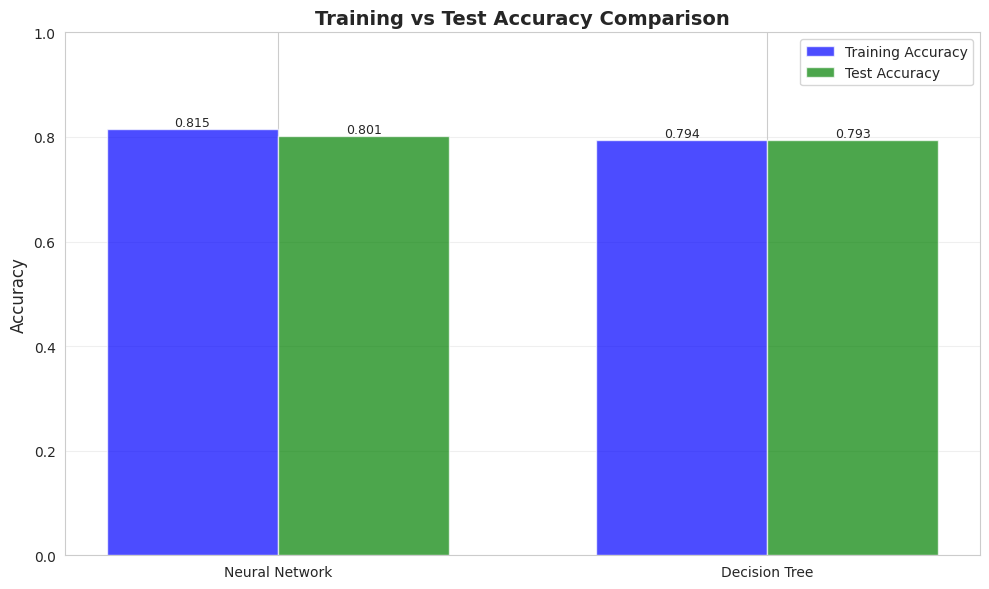


ANALYSIS COMPLETE


In [30]:
# Calculate Training vs Test Accuracy Comparison
print("="*80)
print("TRAINING vs TEST ACCURACY COMPARISON")
print("="*80)

# ============================================
# Neural Network - Training vs Test Accuracy
# ============================================
print("\n" + "-"*80)
print("NEURAL NETWORK MODEL")
print("-"*80)

# Predict on training data
y_train_pred_nn = nn_best.predict(X_train_scaled)
train_accuracy_nn = accuracy_score(y_train, y_train_pred_nn)

# Test accuracy (already calculated)
test_accuracy_nn = accuracy_nn_best

# Calculate difference
accuracy_diff_nn = train_accuracy_nn - test_accuracy_nn
diff_percent_nn = accuracy_diff_nn * 100

print(f"Training Accuracy: {train_accuracy_nn:.4f} ({train_accuracy_nn*100:.2f}%)")
print(f"Test Accuracy:     {test_accuracy_nn:.4f} ({test_accuracy_nn*100:.2f}%)")
print(f"Difference:        {accuracy_diff_nn:.4f} ({diff_percent_nn:.2f}%)")

# Interpretation
if abs(accuracy_diff_nn) < 0.02:
    print(" Excellent: Very small difference - model generalizes well!")
elif abs(accuracy_diff_nn) < 0.05:
    print(" Good: Small difference - model generalizes reasonably well")
elif abs(accuracy_diff_nn) < 0.10:
    print(" Warning: Moderate difference - some overfitting may be present")
else:
    print(" Problem: Large difference - significant overfitting detected!")

# ============================================
# Decision Tree - Training vs Test Accuracy
# ============================================
print("\n" + "-"*80)
print("DECISION TREE MODEL")
print("-"*80)

# Predict on training data
y_train_pred_dt = dt_best.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)

# Test accuracy (already calculated)
test_accuracy_dt = accuracy_dt_best

# Calculate difference
accuracy_diff_dt = train_accuracy_dt - test_accuracy_dt
diff_percent_dt = accuracy_diff_dt * 100
print(f"Training Accuracy: {train_accuracy_dt:.4f} ({train_accuracy_dt*100:.2f}%)")
print(f"Test Accuracy:     {test_accuracy_dt:.4f} ({test_accuracy_dt*100:.2f}%)")
print(f"Difference:        {accuracy_diff_dt:.4f} ({diff_percent_dt:.2f}%)")

# Interpretation
if abs(accuracy_diff_dt) < 0.02:
    print(" Excellent: Very small difference - model generalizes well!")
elif abs(accuracy_diff_dt) < 0.05:
    print(" Good: Small difference - model generalizes reasonably well")
elif abs(accuracy_diff_dt) < 0.10:
    print(" Warning: Moderate difference - some overfitting may be present")
else:
    print(" Problem: Large difference - significant overfitting detected!")

# ============================================
# Summary Table
# ============================================
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)

comparison_table = pd.DataFrame({
    'Model': ['Neural Network', 'Decision Tree'],
    'Training Accuracy': [f"{train_accuracy_nn:.4f}", f"{train_accuracy_dt:.4f}"],
    'Test Accuracy': [f"{test_accuracy_nn:.4f}", f"{test_accuracy_dt:.4f}"],
    'Difference': [f"{accuracy_diff_nn:.4f}", f"{accuracy_diff_dt:.4f}"],
    'Difference %': [f"{diff_percent_nn:.2f}%", f"{diff_percent_dt:.2f}%"]
})

display(comparison_table)

# ============================================
# Visualization
# ============================================
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Neural Network', 'Decision Tree']
train_accs = [train_accuracy_nn, train_accuracy_dt]
test_accs = [test_accuracy_nn, test_accuracy_dt]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, train_accs, width, label='Training Accuracy', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy', color='green', alpha=0.7)

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Training vs Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim([0, 1])
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)


## 6. Model Evaluation and Visualization

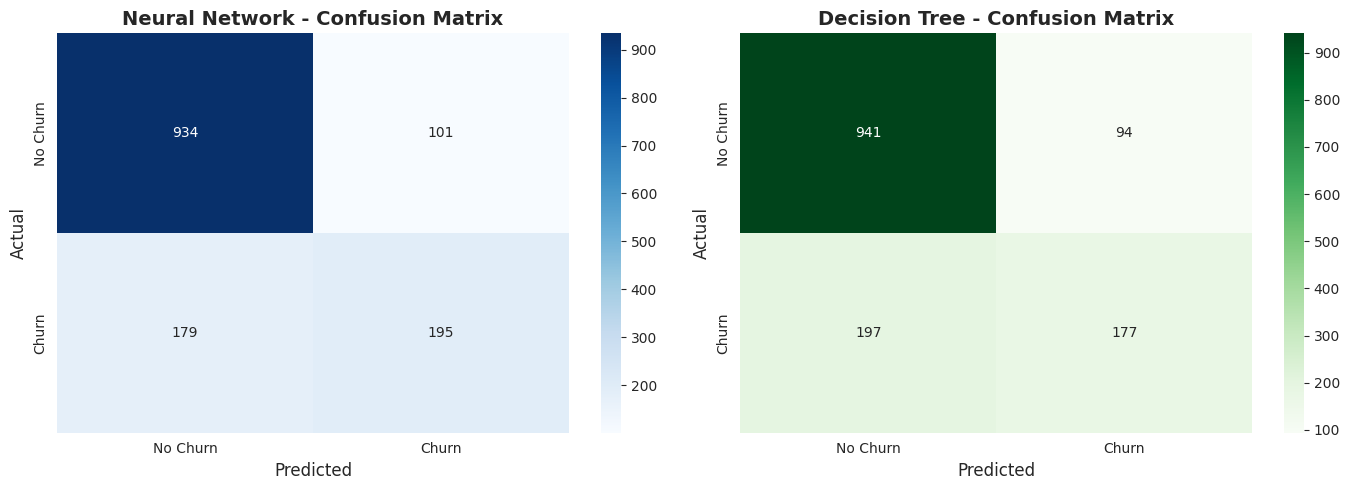

In [31]:
# Confusion Matrices Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Neural Network Confusion Matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
axes[0].set_title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xlabel('Predicted', fontsize=12)

# Decision Tree Confusion Matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
axes[1].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xlabel('Predicted', fontsize=12)

plt.tight_layout()
plt.show()

In [32]:

!ls /content/drive/MyDrive/ML_CW/

CSV_FILE.csv  Task1.ipynb  Task2.ipynb


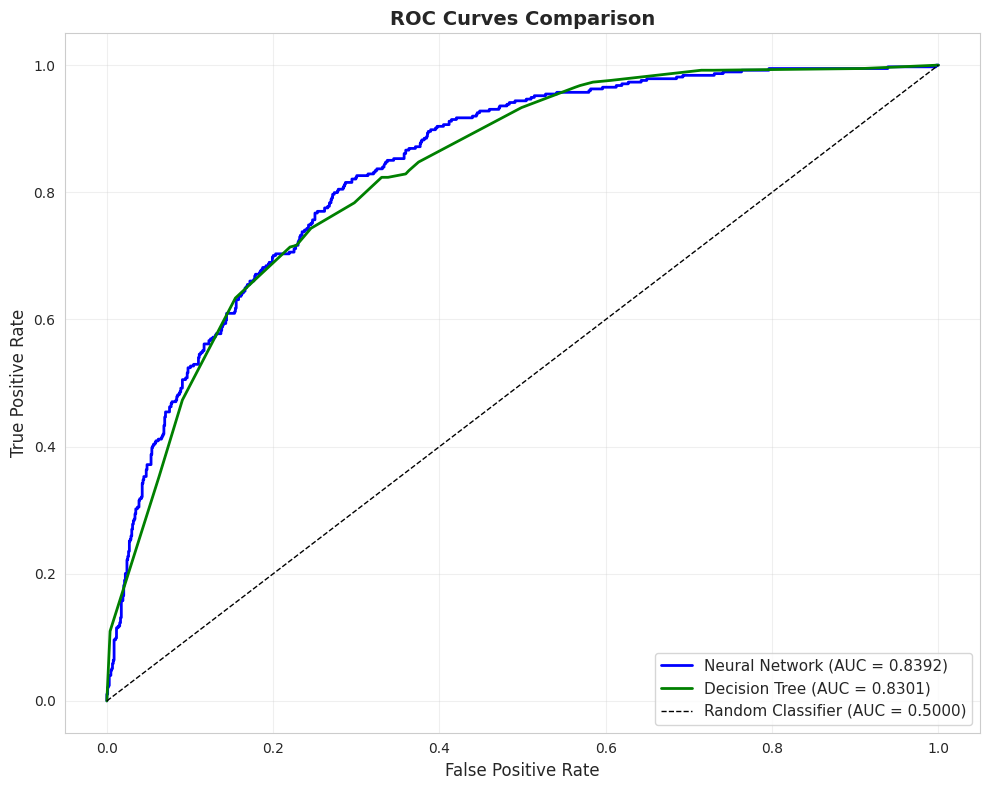

In [33]:
# ROC Curves Comparison
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn_best)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt_best)

plt.figure(figsize=(10, 8))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn_best:.4f})',
         color='blue', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt_best:.4f})',
         color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5000)', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

MODEL PERFORMANCE COMPARISON


,Neural Network,Decision Tree
Accuracy,0.801278,0.793471
Precision,0.658784,0.653137
Recall,0.521390,0.473262
F1-Score,0.582090,0.548837
ROC-AUC,0.839167,0.830094


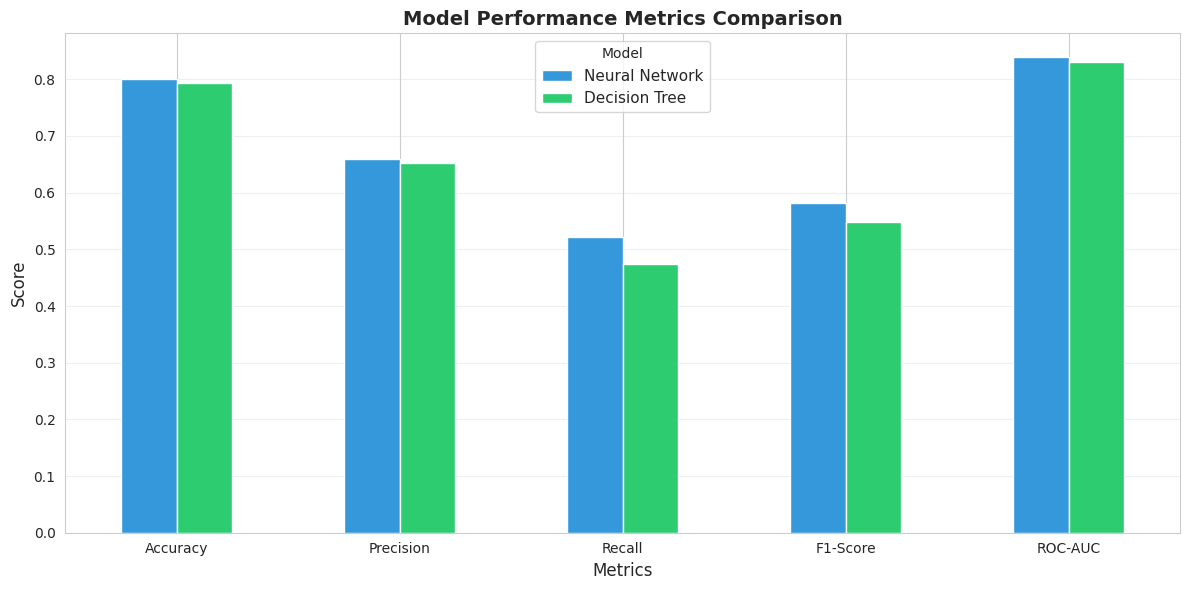

In [35]:
# Performance Metrics Comparison
metrics_comparison = pd.DataFrame({
    'Neural Network': [accuracy_nn_best, precision_nn_best, recall_nn_best, f1_nn_best, auc_nn_best],
    'Decision Tree': [accuracy_dt_best, precision_dt_best, recall_dt_best, f1_dt_best, auc_dt_best]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

print("="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
display(metrics_comparison)

# Visualize metrics comparison
metrics_comparison.plot(kind='bar', figsize=(12, 6), color=['#3498db', '#2ecc71'])
plt.title('Model Performance Metrics Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Model', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 7. Cross-Validation Results

5-FOLD CROSS-VALIDATION RESULTS

Neural Network Cross-Validation (ROC-AUC):
  Scores: [0.85922075 0.84939331 0.84568126 0.83765531 0.82116325]
  Mean:   0.8426 (+/- 0.0255)

Decision Tree Cross-Validation (ROC-AUC):
  Scores: [0.83929322 0.83621532 0.8220659  0.8228071  0.80861437]
  Mean:   0.8258 (+/- 0.0221)


/tmp/ipython-input-1250152889.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_scores_nn, cv_scores_dt], labels=['Neural Network', 'Decision Tree'])


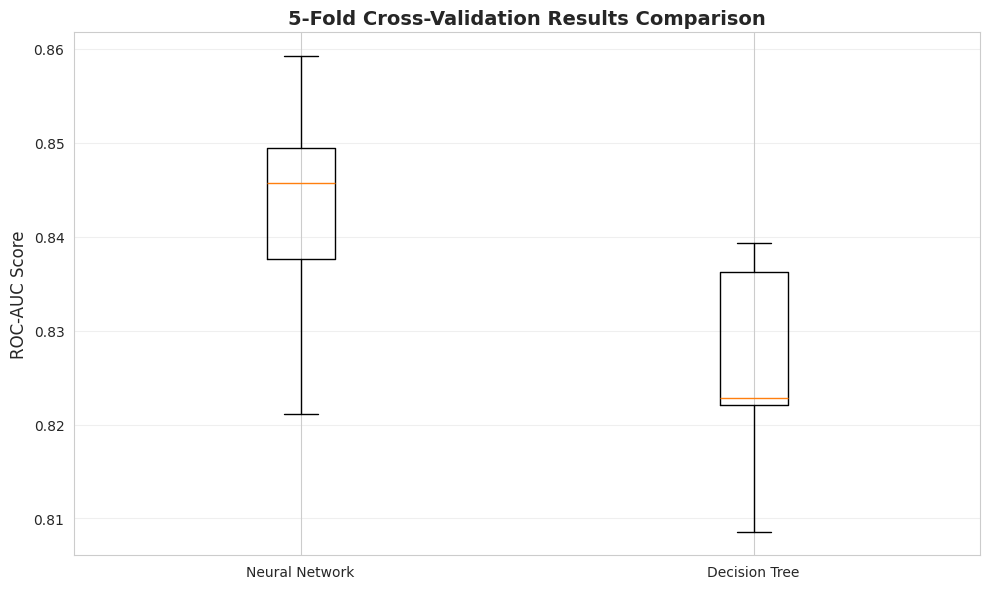

In [36]:
# 5-Fold Cross-Validation for both models
print("="*80)
print("5-FOLD CROSS-VALIDATION RESULTS")
print("="*80)

# Neural Network Cross-Validation
cv_scores_nn = cross_val_score(nn_best, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"\nNeural Network Cross-Validation (ROC-AUC):")
print(f"  Scores: {cv_scores_nn}")
print(f"  Mean:   {cv_scores_nn.mean():.4f} (+/- {cv_scores_nn.std() * 2:.4f})")

# Decision Tree Cross-Validation
cv_scores_dt = cross_val_score(dt_best, X_train, y_train, cv=5, scoring='roc_auc')
print(f"\nDecision Tree Cross-Validation (ROC-AUC):")
print(f"  Scores: {cv_scores_dt}")
print(f"  Mean:   {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std() * 2:.4f})")

# Visualize cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot([cv_scores_nn, cv_scores_dt], labels=['Neural Network', 'Decision Tree'])
plt.ylabel('ROC-AUC Score', fontsize=12)
plt.title('5-Fold Cross-Validation Results Comparison', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 8. Feature Importance (Decision Tree)

TOP 15 MOST IMPORTANT FEATURES (Decision Tree)


,Feature,Importance
25,Contract_Two year,0.360606
24,Contract_One year,0.228822
1,tenure,0.130489
10,InternetService_Fiber optic,0.127190
28,PaymentMethod_Electronic check,0.036966
2,MonthlyCharges,0.035749
3,TotalCharges,0.034715
23,StreamingMovies_Yes,0.032523
11,InternetService_No,0.012940
7,PhoneService_Yes,0.000000


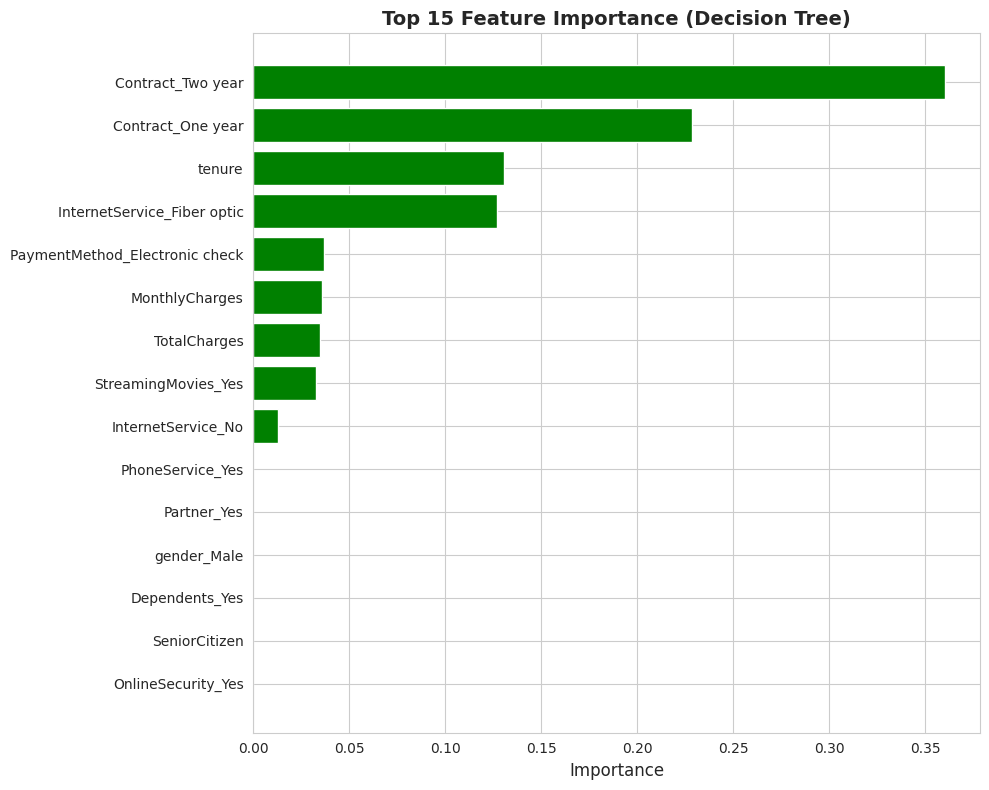

In [37]:
# Feature Importance from Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_best.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*80)
print("TOP 15 MOST IMPORTANT FEATURES (Decision Tree)")
print("="*80)
display(feature_importance.head(15))

# Visualize top features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'].values, color='green')
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('Importance', fontsize=12)
plt.title('Top 15 Feature Importance (Decision Tree)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 9. Summary and Conclusions

In [39]:
print("="*80)
print("TASK 2 - MODEL IMPLEMENTATION SUMMARY")
print("="*80)

print("\n1. DATA PREPROCESSING:")
print("    Removed customerID")
print("    Handled TotalCharges empty strings")
print("    Encoded categorical variables (one-hot encoding)")
print("    Scaled features for Neural Network")
print("    Split data: 80% training, 20% testing (stratified)")

print("\n2. NEURAL NETWORK MODEL:")
print(f"   Best Parameters: {nn_grid.best_params_}")
print(f"   Accuracy:  {accuracy_nn_best:.4f}")
print(f"   Precision: {precision_nn_best:.4f}")
print(f"   Recall:    {recall_nn_best:.4f}")
print(f"   F1-Score:  {f1_nn_best:.4f}")
print(f"   ROC-AUC:   {auc_nn_best:.4f}")

print("\n3. DECISION TREE MODEL:")
print(f"   Best Parameters: {dt_grid.best_params_}")
print(f"   Accuracy:  {accuracy_dt_best:.4f}")
print(f"   Precision: {precision_dt_best:.4f}")
print(f"   Recall:    {recall_dt_best:.4f}")
print(f"   F1-Score:  {f1_dt_best:.4f}")
print(f"   ROC-AUC:   {auc_dt_best:.4f}")

print("\n4. MODEL COMPARISON:")
if auc_nn_best > auc_dt_best:
    print(f"    Neural Network performs better (ROC-AUC: {auc_nn_best:.4f} vs {auc_dt_best:.4f})")
else:
    print(f"    Decision Tree performs better (ROC-AUC: {auc_dt_best:.4f} vs {auc_nn_best:.4f})")

print("\n5. KEY INSIGHTS:")
print("   - Both models were tuned using GridSearchCV with 5-fold cross-validation")
print("   - Models evaluated using multiple metrics: Accuracy, Precision, Recall, F1, ROC-AUC")
print("   - Feature importance analysis available for Decision Tree model")
print("   - Cross-validation results show model stability")



TASK 2 - MODEL IMPLEMENTATION SUMMARY

1. DATA PREPROCESSING:
    Removed customerID
    Handled TotalCharges empty strings
    Encoded categorical variables (one-hot encoding)
    Scaled features for Neural Network
    Split data: 80% training, 20% testing (stratified)

2. NEURAL NETWORK MODEL:
   Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
   Accuracy:  0.8013
   Precision: 0.6588
   Recall:    0.5214
   F1-Score:  0.5821
   ROC-AUC:   0.8392

3. DECISION TREE MODEL:
   Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 30}
   Accuracy:  0.7935
   Precision: 0.6531
   Recall:    0.4733
   F1-Score:  0.5488
   ROC-AUC:   0.8301

4. MODEL COMPARISON:
    Neural Network performs better (ROC-AUC: 0.8392 vs 0.8301)

5. KEY INSIGHTS:
   - Both models were tuned using GridSearchCV with 5-fold cross-validation
   - Models evaluated using multiple metrics: Accuracy, Precis